# Financial Analysis with Python




## Pay Off Anlysis
* Ploting the payoff for some vanilla call options
$$C_{pay} = max \{S_T-K,0\};\qquad  \text{Call Options}$$
$$P_{pay} = max \{K-S_T,0\};\qquad  \text{Put Options}$$
for:

k = Strike price

$S_T$ = Asset price at Expiry

In [85]:
import numpy as np 
import matplotlib.pyplot as plt #ploting package

In [86]:
def call_payoff(S_T,K):
    C_pay = max(K-S_T,0) #Payoff function for Vanilla call options
    return C_pay

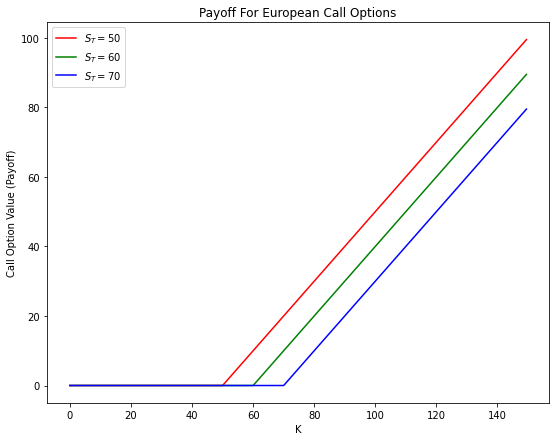

In [87]:
K_Strike = np.arange(0,150,0.5) #Different strike proces
S_T_Asset_price = [50,60,70] #Asset prices
Pay_option1, Pay_option2, Pay_option3 = [ ], [ ], [ ] # payoffs empty list

for K in K_Strike:
    Pay_option1.append( call_payoff(S_T_Asset_price[0],K) )
    Pay_option2.append( call_payoff(S_T_Asset_price[1],K) )
    Pay_option3.append( call_payoff(S_T_Asset_price[2],K) )

plt.figure(figsize=(9, 7))
# Option 1
x1,y1 = K_Strike,Pay_option1
plt.plot(x1, y1, label = r"$S_T=50$",color = "r") #plot for opt1
 
# Option 2
x2,y2 = K_Strike,Pay_option2
plt.plot(x2, y2, label = r"$S_T=60$",color = "g") #plot for opt2
 
# Option 3
x3,y3 = K_Strike,Pay_option3
plt.plot(x3, y3, label = r"$S_T=70$",color = "b") #plot for opt3


# graph properties
plt.ylabel('Call Option Value (Payoff)')
plt.xlabel("K")
plt.title('Payoff For European Call Options')
plt.legend()
plt.show() #display of the graph

When $S =100$, then $P=0$, which means that the portfolio would not have any profit before the exercise time.

# Stock Analysis 

In [88]:
import numpy as np
import pandas as pd 
np.random.seed(1000)
import scipy.stats as scs
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [89]:
!pip3 install yfinance --upgrade #intsall yfinance package to be used to access amzon stocks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import yfinance as yf #Importing the yfinance package
dta = yf.download ("AMZN",start="2004-01-01",end="2022-03-07") #Downloading the required data directly from yahoo, AMAZON DATA from 2014 to 2022

[*********************100%***********************]  1 of 1 completed


In [91]:
data = pd.DataFrame(dta) #Converting into a dataframe structure
data #data check

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,2.638000,2.656500,2.571500,2.595000,2.595000,132798000
2004-01-05,2.600000,2.680000,2.568500,2.663500,2.663500,225682000
2004-01-06,2.655500,2.675000,2.637000,2.651500,2.651500,119710000
2004-01-07,2.609000,2.633000,2.547000,2.595000,2.595000,184854000
2004-01-08,2.604500,2.605000,2.501500,2.512000,2.512000,206406000
...,...,...,...,...,...,...
2022-02-28,152.425003,154.449997,150.850006,153.563004,153.563004,57684000
2022-03-01,152.732498,154.098999,149.977005,151.141998,151.141998,44874000
2022-03-02,150.848999,152.999496,148.750000,152.052505,152.052505,47334000


In [92]:
Adj_Close = data['Adj Close'] #Extracting the data requid for the anlysis
Adj_Close = pd.DataFrame(Adj_Close) #Converting to a dataframe structure
Adj_Close #Data check

,Adj Close
Date,
2004-01-02,2.595000
2004-01-05,2.663500
2004-01-06,2.651500
2004-01-07,2.595000
2004-01-08,2.512000
...,...
2022-02-28,153.563004
2022-03-01,151.141998
2022-03-02,152.052505


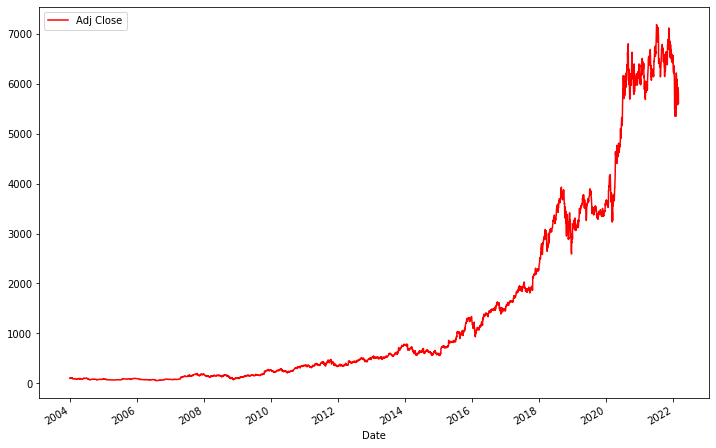

In [93]:
(Adj_Close / Adj_Close.iloc[0]*100).plot(figsize=(12,8),color = 'r') #plotting stock prices

In [94]:
log_returns = np.log(Adj_Close / Adj_Close.shift(1)) #calculating log returns
log_returns #Viewing the log log returns

,Adj Close
Date,
2004-01-02,NaN
2004-01-05,0.026055
2004-01-06,-0.004516
2004-01-07,-0.021539
2004-01-08,-0.032507
...,...
2022-02-28,-0.001467
2022-03-01,-0.015891
2022-03-02,0.006006


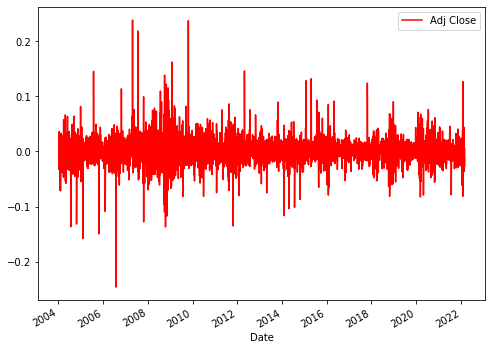

In [95]:
log_returns.plot(figsize=(8, 6),color = 'r') #plotting the log returns

In [96]:
Adj_Close=Adj_Close.dropna(axis=0,how='any')    # how = 'all' drops only complete rows of NA, how = 'any' drops all rows containing NA
Adj_Close.head() #Data check

,Adj Close
Date,
2004-01-02,2.5950
2004-01-05,2.6635
2004-01-06,2.6515
2004-01-07,2.5950
2004-01-08,2.5120


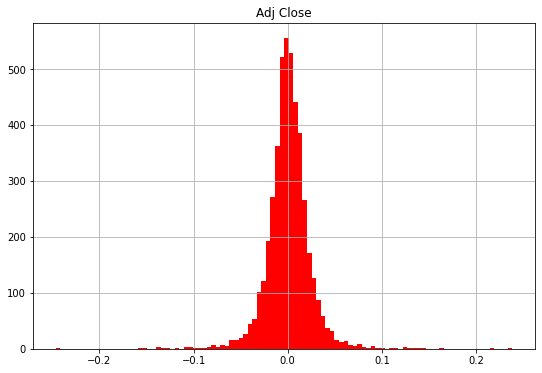

In [97]:
log_returns.hist(bins=100, figsize=(9, 6),color = 'r') #histogram plot for "Adj Close" for Amazon
plt.show()

## Fitting a normal distribution to the above histogram

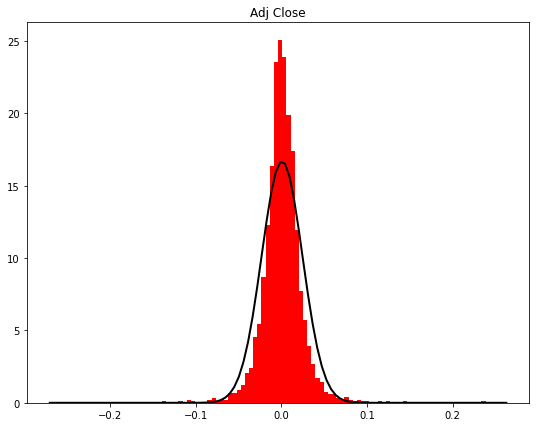

In [98]:
import numpy as np
from scipy.stats import norm
L = log_returns.values #extraxting the log returns into an array
L = np.delete(L, 0) #deleting the null entry in the array

plt.figure(figsize=(9, 7))
mu, std = norm.fit(L) #Use the log returns to find the mean and std for the plot
plt.hist(L, bins=100, density=True, alpha=1, color='r') # Plot the histogram.
# plotting the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Adj Close"
plt.title(title)
plt.show()

#Perfoming a statistic test on the Adj Close data

In [99]:
def print_statistics(array):  
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray       (object to generate statistics on)
    '''
    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value'))
    print (30 * "-")
    print ("%14s %15.5f" % ('size', sta[0]))
    print ("%14s %15.5f" % ('min', sta[1][0]))
    print ("%14s %15.5f" % ('max', sta[1][1]))
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))


In [100]:
print ("\nResults for symbol %s" % 'Adj Close')
print (30 * "-")
log_data = np.array(log_returns['Adj Close'].dropna())
print_statistics(log_data)


Results for symbol Adj Close
------------------------------
     statistic           value
------------------------------
          size      4574.00000
           min        -0.24618
           max         0.23862
          mean         0.00088
           std         0.02390
          skew         0.34654
      kurtosis        13.54457


# Normality Test

In [101]:
def normality_test(arr):
    ''' Tests for normality distribution of given data set.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    print ("Skew of data set %14.3f" % scs.skew(arr))
    print ("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print ("Kurt of data set %14.3f" % scs.kurtosis(arr))
    print ("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print ("Norm test p-value %14.3f" % scs.normaltest(arr)[1])


Results for symbol Adj Close
--------------------------------
Skew of data set          0.347
Skew test p-value          0.000
Kurt of data set         13.545
Kurt test p-value          0.000
Norm test p-value          0.000
 


Text(0.5, 1.0, 'qqplot of Adj Close')

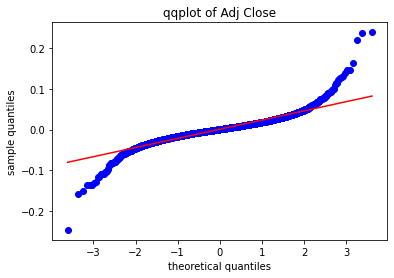

In [102]:
import scipy.stats as scs

print ("\nResults for symbol %s" % 'Adj Close')
print (32 * "-")
log_data = np.array(log_returns['Adj Close'].dropna())
normality_test(log_data)
print(" ")

scs.probplot(log_returns['Adj Close'].dropna(),plot=plt,fit=True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title('qqplot of Adj Close')

# Volatility Anlysis for the past 5 years

In [103]:
Last_5_years = yf.download ("AMZN",start="2017-03-01",end="2022-03-07") #Adj Close Amazon data fro the last 5 years
Last_5_years = pd.DataFrame(Last_5_years) #Converting to dataframe structure
Last_5_years=Last_5_years['Adj Close'] #Extracting the required field
Last_5_years = pd.DataFrame(Last_5_years) #Converting to dataframe structure
Last_5_years #Data check

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2017-03-01,42.653999
2017-03-02,42.445499
2017-03-03,42.493999
2017-03-06,42.330502
2017-03-07,42.300999
...,...
2022-02-28,153.563004
2022-03-01,151.141998
2022-03-02,152.052505


In [104]:
log_returns_last_5_years = np.log(Last_5_years / Last_5_years.shift(1)) #calculating log returns
#log_returns_last_5_years #Viewing the log log returns 

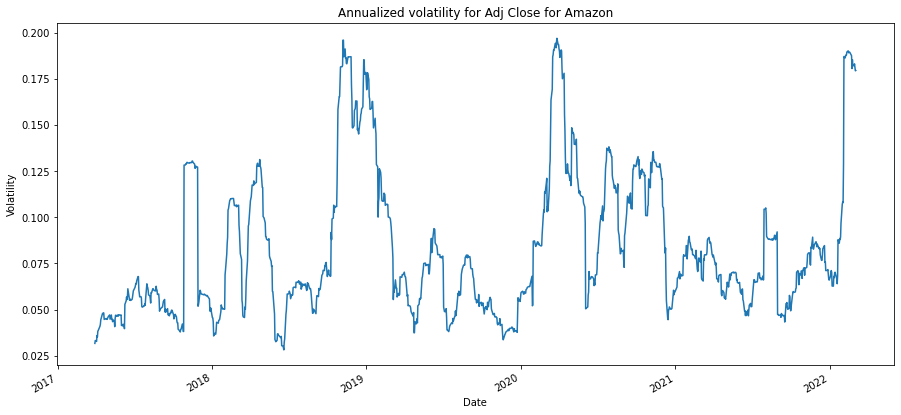

In [107]:
TRADING_DAYS = 22 #montly working days
log_returns_last_5_years.fillna(0, inplace=True)
volatility = log_returns_last_5_years.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS) #calculating the votality
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility['Adj Close'].plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for Adj Close for Amazon')
plt.show()